In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spam_data = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
spam_data = spam_data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [5]:
spam_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
spam_data['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [7]:
spam_data['v1'] = spam_data['v1'].replace(['ham','spam'],[0,1])

In [8]:
spam_data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
spam_data.isnull().sum()

v1    0
v2    0
dtype: int64

C:\Users\mdfai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='v1', ylabel='count'>

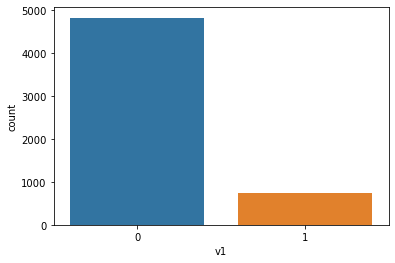

In [10]:
sns.countplot(spam_data['v1'],data=spam_data)

In [11]:
spam_data['v2'] = spam_data['v2'].apply(lambda x: x.lower())

In [12]:
spam_data.head()

,v1,v2
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [13]:
import string
def remove_punc(data):
    data_rev = ''.join([i for i in data if i not in string.punctuation])
    return data_rev

In [14]:
spam_data['v2'] = spam_data['v2'].apply(lambda x: remove_punc(x))

In [15]:
spam_data.head()

,v1,v2
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [16]:
spam_data['v2'] = spam_data['v2'].replace(['^\w\s'],' ')

In [17]:
spam_data.head()

,v1,v2
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [18]:
spam_data['v2'] = spam_data['v2'].replace('\d',' ')

In [19]:
spam_data.head()

,v1,v2
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [20]:
from nltk.stem import WordNetLemmatizer
word = WordNetLemmatizer()

In [21]:
spam_data['v2'] = spam_data['v2'].apply(lambda x: word.lemmatize(x))

In [22]:
spam_data.head()

,v1,v2
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [23]:
from nltk.corpus import stopwords

In [24]:
sw = stopwords.words('english')

In [25]:
spam_data['v2'] = spam_data['v2'].apply(lambda x: ' '.join(i for i in x.split() if i not in sw))

In [26]:
spam_data.head()

,v1,v2
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


In [27]:
from wordcloud import WordCloud

In [28]:
text = " ".join(i for i in spam_data['v2'])

In [29]:
word_cloud = WordCloud(collocations=False, background_color = 'black').generate(text)

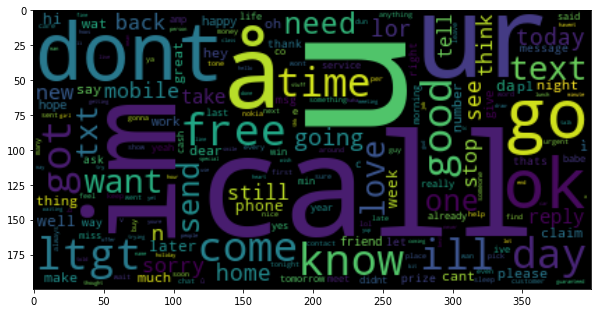

In [30]:
plt.figure(figsize=(10,10))
plt.imshow(word_cloud,interpolation='bilinear')
plt.show()

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
cv = CountVectorizer()

In [34]:
x= cv.fit_transform(spam_data['v2'])

In [35]:
y = spam_data['v1']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [39]:
y_pred = lr.predict(x_test)

In [40]:
accuracy_score(y_pred,y_test)

0.9730861244019139